## Final Project Submission

Please fill out:
* Student name: Thomas Brown
* Student pace: Full Time
* Scheduled project review date/time: tbd
* Instructor name: Abhineet Kulkarni
* Blog post URL: tbd


In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Importing Data:

Let's import the csv file into a Pandas dataframe  and look at the first few rows as well as the basic meta-data.

In [2]:
df = pd.read_csv('kc_house_data.csv')
display(df.head())
display(df.info())

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

## Exploring Data:

### Columns:

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Here's a list of the columns in the dataframe:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Data Cleaning:

Right off the bat, we see that the following columns will need to be cleaned:
- __Waterfront__
- __View__
- __Year Renovated__

In [4]:
# Shows number of null values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Waterfront:

In [5]:
display(df['waterfront'].unique())
nulls1 = df['waterfront'].isna().sum()
print (f"{nulls1} null values in 'Waterfront'")
# Let's replace NaNs with 0s.  No further cleaning needed, this makes it a perfect dummy variable. 
# Given there are over 2,000 null values, I think it's safe to say these are meant to be 0s (not waterfront).

array([nan,  0.,  1.])

2376 null values in 'Waterfront'


In [6]:
# Replacing the nulls with 0s. 
df['waterfront'].fillna(0, inplace = True)
# Verifying that it worked
df['waterfront'].unique()

array([0., 1.])

### View:

In [7]:
# Identifying the issue. . . (If code has already been run, null won't appear)
display(df['view'].unique())
nulls2 = df['view'].isna().sum()
print (f"{nulls2} null values in 'View'")
# Only 63 null values to deal with.  
# Null values here should likely just be replaced with 0 as well

array([ 0., nan,  3.,  4.,  2.,  1.])

63 null values in 'View'


In [8]:
# Let's start by replacing the nulls with 0.
df['view'].fillna(0, inplace = True)

In [9]:
# Just to be safe, I'm also making a new column, just to see whether or not a house has been viewed at all.
df['has_view'] = df['view'].map(lambda x: 1 if x > 0 else 0)

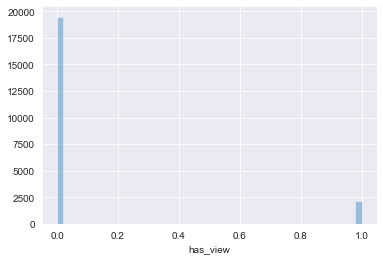

In [10]:
# It's strange that so many houses have 0 views. . . 
sns.distplot(df.has_view, kde = False)

### Year Renovated:

Here, we have 3,842 values to replace. Given we have a 0 value, I think it's safe to replace the nulls with 0s. These represent houses that have not been renovated.

In [11]:
display(df['yr_renovated'].unique())
nulls3 = df['yr_renovated'].isna().sum()
print (f"{nulls3} null values in 'Year Renovated'")

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

3842 null values in 'Year Renovated'


In [12]:
df.yr_renovated.value_counts()
# Vast majority of houses have not seen renovations.

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

__We have a couple things to do here:__
- We need to replace the null values with 0s.  I think it's safe to assume that nulls, have not been renovated.
    - If it were a more significant portion of the total houses listed (~22k) I would likely use a more <br>
    elegant solution such replacing nulls with year built + average time from build to remodel.
    - For now, though, I'm assuming these houses have not been remodeled.
- Second, I don't want to lose the year renovated, but I also need a dummy variable for is renovated or not. <br>
As such, I'll start with making a new column, "has_been_renovated" where 0 is "no renovation" and 1 is "has been renovated"

In [13]:
# Let's start by tackling those nulls and then making a dummy variable:
df['yr_renovated'].fillna(0, inplace = True)
df['has_ren'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df.head(2)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0      5650     1.0         0.0   0.0  ...            0.0      1955   
1      7242     2.0         0.0   0.0  ...          400.0      1951   

   yr_renovated zipcode      lat     long  sqft_living15  sqft_lot15  \
0           0.0   98178  47.5112 -122.257           1340        5650   
1        1991.0   98125  47.7210 -122.319           1690        7639   

   has_view  has_ren  
0         0        0  
1         0        1  

[2 rows x 23 columns]

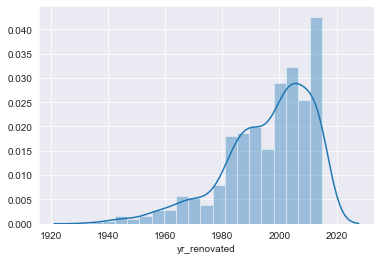

In [14]:
# Histogram of renovation for homes that have seen a renovation.
dftest = df[df['yr_renovated'] > 1]
sns.distplot(dftest.yr_renovated);

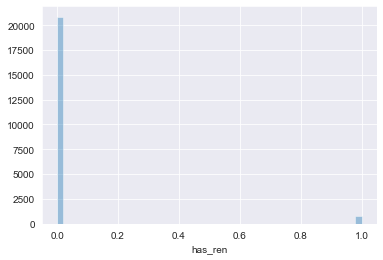

In [15]:
# Histogram showing proportion of homes that have been renovated.
sns.distplot(df.has_ren, kde = False);

In [16]:
# Only 744 renovations overall
df.has_ren.value_counts()

0    20853
1      744
Name: has_ren, dtype: int64

### SquareFeet Basement:

If you look closely, you'll see a value listed as '?' listed below.  We'll need to replace those with 0s!
We'll also want to convert this to an int value when complete.
<br>We'll want a dummy variable here as well to deal with the large majority of 0s in the distribution.

In [17]:
# Here, we're replacing the '?' with a 0, then converting all values to int
df['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x == '?' else x)
df['sqft_basement'] = df['sqft_basement'].astype('float')

In [18]:
# Creating a dummy variable to deal with the 0 biased basement issue
df['has_basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
df.head(2)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   

   sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  zipcode  \
0      5650     1.0         0.0   0.0  ...      1955           0.0    98178   
1      7242     2.0         0.0   0.0  ...      1951        1991.0    98125   

       lat     long  sqft_living15  sqft_lot15  has_view  has_ren  \
0  47.5112 -122.257           1340        5650         0        0   
1  47.7210 -122.319           1690        7639         0        1   

   has_basement  
0             0  
1             1  

[2 rows x 24 columns]

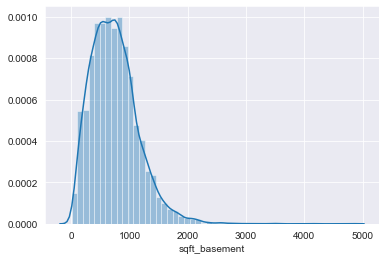

In [19]:
# Histogram of basement square feet for homes with basements.
dftest2 = df[df['sqft_basement'] > 1]
sns.distplot(dftest2.sqft_basement);

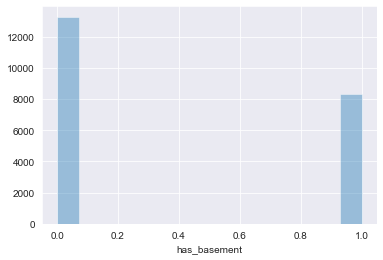

In [20]:
# Dummy variable below.  Now we can simply see if having a basement adds value.
sns.distplot(df.has_basement, kde = False);

### Grade:

In [21]:
df['grade'].unique()
# Strange, it appears to be a scale from 3 to 13.  By subracting 3 from all, we can normalize the scale.

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [22]:
# 0 through 10.  Much better.
df['grade'] = df['grade'].map(lambda x: x - 3)
df['grade'].unique()

array([ 4,  3,  5,  8,  6,  2,  7,  9,  1,  0, 10])

### Date:

Here, I simply changed the format so it can be read more easily later on.

In [23]:
df['date'] = pd.to_datetime(df['date'])

Let's also add a column for month sold.  This will be useful later.

In [24]:
df['month']= pd.DatetimeIndex(df['date']).month
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  yr_renovated  zipcode      lat  \
0      5650     1.0         0.0   0.0  ...           0.0    98178  47.5112   
1      7242     2.0         0.0   0.0  ...        1991.0    98125  47.7210   
2     10000     1.0         0.0   0.0  ...           0.0    98028  47.7379   
3      5000     1.0         0.0   0.0  ...           0.0    98136  47.5208   
4      8080     1.0         0.0   0.0  ...           0.0    98074  47.6168   

      long  sqft_living15  sqft_lot15  has_view  has_ren  has_basement  month  
0 -122.257           1340        5650         0        0             0     10  
1 -122.319           1690        7639         0        1             1     12  
2 -122.233           2720        8062         0        0             0      2  
3 -122.393           1360        5000         0        0             1     12  
4 -122.045           1800        7503         0        0             0      2  

[5 rows x 25 columns]

## Importing City Data:

In [25]:
# Data collected from a variety of sources, parsed in excel, and uploaded here.
cities = pd.read_csv('zip_code_data_ii.csv')
cities.drop(columns = 'Unnamed: 2', axis = 1, inplace = True)
cities.drop(columns = 'Unnamed: 3', axis = 1, inplace = True)
cities.head()

zip       city
0  98002   South KC
1  98092   South KC
2  98224  East Side
3  98004   Bellevue
4  98005   Bellevue

In [26]:
# Appears to be working
df = df.join(cities.set_index('zip'), on = 'zipcode', how = 'left')
display(df.head(3))
num_cities = cities['city'].nunique()
print(f'{num_cities} unique cities/areas')

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   

   sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
0      5650     1.0         0.0   0.0  ...    98178  47.5112 -122.257   
1      7242     2.0         0.0   0.0  ...    98125  47.7210 -122.319   
2     10000     1.0         0.0   0.0  ...    98028  47.7379 -122.233   

   sqft_living15  sqft_lot15  has_view  has_ren  has_basement  month  \
0           1340        5650         0        0             0     10   
1           1690        7639         0        1             1     12   
2           2720        8062         0        0             0      2   

        city  
0     Renton  
1  N Seattle  
2   North KC  

[3 rows x 26 columns]

16 unique cities/areas


In [27]:
# So far so good.  This should help our model later on.
df['city'].unique()

array(['Renton', 'N Seattle', 'North KC', 'W Seattle', 'Sammamish',
       'East Side', 'Federal Way', 'South KC', 'Bellevue',
       'Mercer Island', 'Kent', 'Seattle', 'Burien', 'Vashon', 'Kirkland',
       'Medina'], dtype=object)

## Removing Outliers:

In [28]:
# Here, we'll be removing rows that are outside 3 standard deviations.
# This will help our model, as outliers can heavily skew models.
# We need to be careful to not remove outliers from things such as zip-code, though.
import scipy.stats as stats
for col in ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 
            'yr_built', 'sqft_above', 'sqft_living15', 'sqft_lot15']:
    df.drop(df.loc[np.abs(stats.zscore(df[col]))>3].index, axis=0, inplace=True)
df.info()
# We dropped around 1.5k outliers, but this should help our model later on.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20064 entries, 0 to 21596
Data columns (total 26 columns):
id               20064 non-null int64
date             20064 non-null datetime64[ns]
price            20064 non-null float64
bedrooms         20064 non-null int64
bathrooms        20064 non-null float64
sqft_living      20064 non-null int64
sqft_lot         20064 non-null int64
floors           20064 non-null float64
waterfront       20064 non-null float64
view             20064 non-null float64
condition        20064 non-null int64
grade            20064 non-null int64
sqft_above       20064 non-null int64
sqft_basement    20064 non-null float64
yr_built         20064 non-null int64
yr_renovated     20064 non-null float64
zipcode          20064 non-null int64
lat              20064 non-null float64
long             20064 non-null float64
sqft_living15    20064 non-null int64
sqft_lot15       20064 non-null int64
has_view         20064 non-null int64
has_ren          20064 non-n

# Exploratory Data Analysis:

## Q1: 

Idea: Map of KC with heat over size of house relative to price. . .

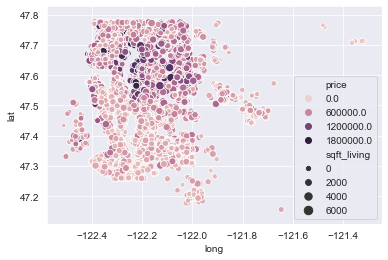

In [29]:
ax = sns.scatterplot(data = df, x = 'long',y = 'lat', hue = 'price', 
                     size = 'sqft_living')
sns.set(rc={'figure.figsize':(12,9)})
# Need to figure out the color min/max.  Also would be awesome to set this over an actual map.

### Folium Map:

Here, we'll use a more sophisticated mapping library to see housing prices  in different areas.<br>
This can give us a good idea of where the most expensive areas are.

In [30]:
import folium

kc_coord = (47.6062, -122.335167)
max_records = 300 # Keeps it running quickly for now
# Creating an empty map
map = folium.Map(location = kc_coord, zoom_start = 11, tiles='Cartodb Positron')

# Adding markers:
'''ADJUST CODE LATER'''
from folium.plugins import HeatMap
HeatMap(data=df[['lat', 'long', 'price']].\
        groupby(['lat', 'long']).sum().reset_index().\
        values.tolist(), radius=7.5).add_to(map)

# NOT WORKING FOR NOW
#for each in df[0:max_records].iterrows():
#    folium.map.Marker(location = [each[1]['lat'],each[1]['long']], clustered_marker = True)
  
display(map)

In [31]:
kc_coord = (47.6062, -122.335167)
max_records = 300 # Keeps it running quickly for now
# Creating an empty map
map = folium.Map(location = kc_coord, zoom_start = 11, tiles='Cartodb Positron')

# Adding markers:
'''ADJUST CODE LATER'''
from folium.plugins import HeatMap
HeatMap(data=df[['lat', 'long', 'sqft_living']].\
        groupby(['lat', 'long']).sum().reset_index().\
        values.tolist(), radius=7.5).add_to(map)

# NOT WORKING FOR NOW
#for each in df[0:max_records].iterrows():
#    folium.map.Marker(location = [each[1]['lat'],each[1]['long']], clustered_marker = True)
  
display(map)

## Q2:

How can we exploit the grade system to influence house price if you are attempting to sell?

From King County Assessment Site (normalized to reflect my data): 
- 0 Falls short of minimum building standards. Normally cabin or inferior structure.

- 1 Generally older, low quality construction. Does not meet code.

- 2 Low construction costs and workmanship. Small, simple design.

- 3 Lowest grade currently meeting building code. Low quality materials and simple designs.

- 4 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

- 5 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

- 6 Better architectural design with extra interior and exterior design and quality.

- 7 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

- 8 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

- 9 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

- 10 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [225]:
import plotly.express as px
fig = px.box(df, x='grade', y='price').update_xaxes(categoryorder = 'total ascending')
fig.show()

Conclusion: Buying, renovating, and flipping can be highly profitable!  Especially if you are taking a 5 rated home (just above average) and upgrading it to a 6 by upgrading the interior and exterior finishing touches.  There is a 200K difference between the two medians!  It seems very doable to turn a 5 into a 6 with less than 200K, enabling you to capture a profit.

## Q3:

Does the month you sell in impact house price? 

In [221]:
import plotly.express as px
fig = px.box(df, x='month', y='price').update_xaxes(categoryorder = 'total ascending')
fig.show()

It seems as though month affects average house price very little!<br>
This came as a surprise, but the difference between median house price in December vs April was only ~40K.  While this may be enough to influence some people to wait through the winter, <br>I'm sure we can do better than this.  Let's look at some regression models to see what variables are the most important when it comes to price.  With this, we can determine what would be best to target if you're looking to sell your house.  

# Feature Engineering:

## Multicollinearity:

Multicollinearity is an issue that can lead to a broken regression result when two explanatory variables are too highly correlated for the model to tell which is the driving in terms of the result.

In [32]:
# Checking to see if any potential explanitory variables are highly correlated.
# Anything over .75 will be addressed/removed.
# This chart is a bit unwieldy, but we will look at a simpler version below. 
abs(df.corr()) > 0.75

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id              True  False     False      False        False     False   
price          False   True     False      False        False     False   
bedrooms       False  False      True      False        False     False   
bathrooms      False  False     False       True        False     False   
sqft_living    False  False     False      False         True     False   
sqft_lot       False  False     False      False        False      True   
floors         False  False     False      False        False     False   
waterfront     False  False     False      False        False     False   
view           False  False     False      False        False     False   
condition      False  False     False      False        False     False   
grade          False  False     False      False        False     False   
sqft_above     False  False     False      False         True     False   
sqft_basement  False  False     False      False        False     False   
yr_built       False  False     False      False        False     False   
yr_renovated   False  False     False      False        False     False   
zipcode        False  False     False      False        False     False   
lat            False  False     False      False        False     False   
long           False  False     False      False        False     False   
sqft_living15  False  False     False      False        False     False   
sqft_lot15     False  False     False      False        False      True   
has_view       False  False     False      False        False     False   
has_ren        False  False     False      False        False     False   
has_basement   False  False     False      False        False     False   
month          False  False     False      False        False     False   

               floors  waterfront   view  condition  ...  yr_renovated  \
id              False       False  False      False  ...         False   
price           False       False  False      False  ...         False   
bedrooms        False       False  False      False  ...         False   
bathrooms       False       False  False      False  ...         False   
sqft_living     False       False  False      False  ...         False   
sqft_lot        False       False  False      False  ...         False   
floors           True       False  False      False  ...         False   
waterfront      False        True  False      False  ...         False   
view            False       False   True      False  ...         False   
condition       False       False  False       True  ...         False   
grade           False       False  False      False  ...         False   
sqft_above      False       False  False      False  ...         False   
sqft_basement   False       False  False      False  ...         False   
yr_built        False       False  False      False  ...         False   
yr_renovated    False       False  False      False  ...          True   
zipcode         False       False  False      False  ...         False   
lat             False       False  False      False  ...         False   
long            False       False  False      False  ...         False   
sqft_living15   False       False  False      False  ...         False   
sqft_lot15      False       False  False      False  ...         False   
has_view        False       False   True      False  ...         False   
has_ren         False       False  False      False  ...          True   
has_basement    False       False  False      False  ...         False   
month           False       False  False      False  ...         False   

               zipcode    lat   long  sqft_living15  sqft_lot15  has_view  \
id               False  False  False          False       False     False   
price            False  False  False          False       False     False   
bedrooms         False  False  False          False       Fa

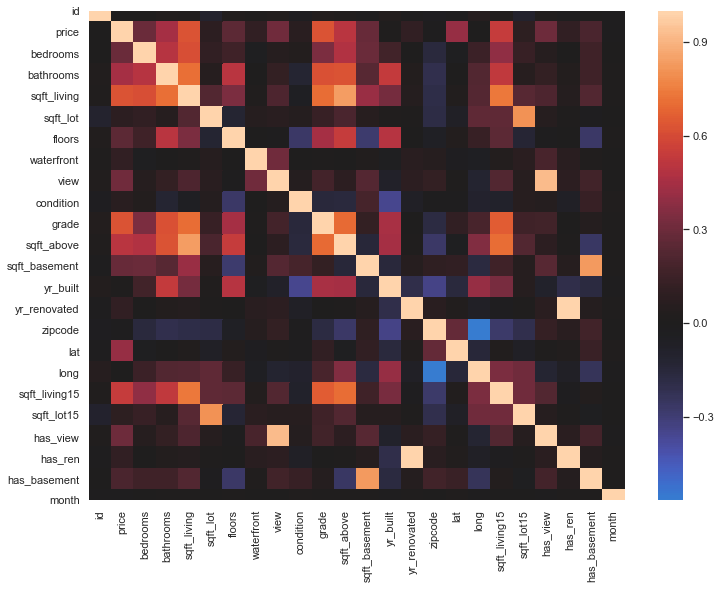

In [33]:
# Heatmap for quick visualization.
sns.heatmap(df.corr(), center=0);

The above chart is a bit messy. We're just searching for values correlated more strongly than .75. Let's simplify it by using a new color scheme, where the color only becomes brighter after a correlation stronger than .75.

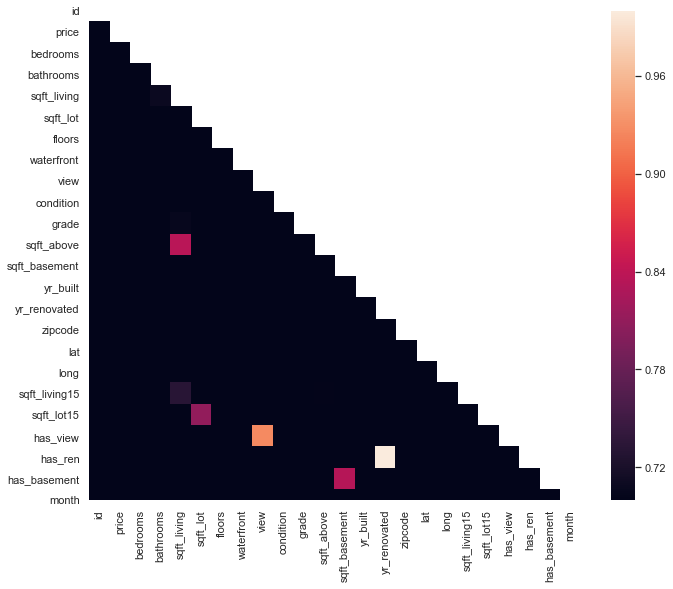

In [34]:
sns.set_style('white')
f, ax = plt.subplots(figsize=(11, 9))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(df.corr(), vmin=0.7, mask = mask);

Much better! From the above chart, we see that we should take the following actions:
- Only use the one hot encoded variables, not the original values they're derived from
    - For example, use "has_view" instead of "view"
- Use sqft_living instead of sqft_living15 or sqft_above. These are all highly correlated, but sqft_living is the most basic version of all these variables.

## Categorical vs. Continuous:

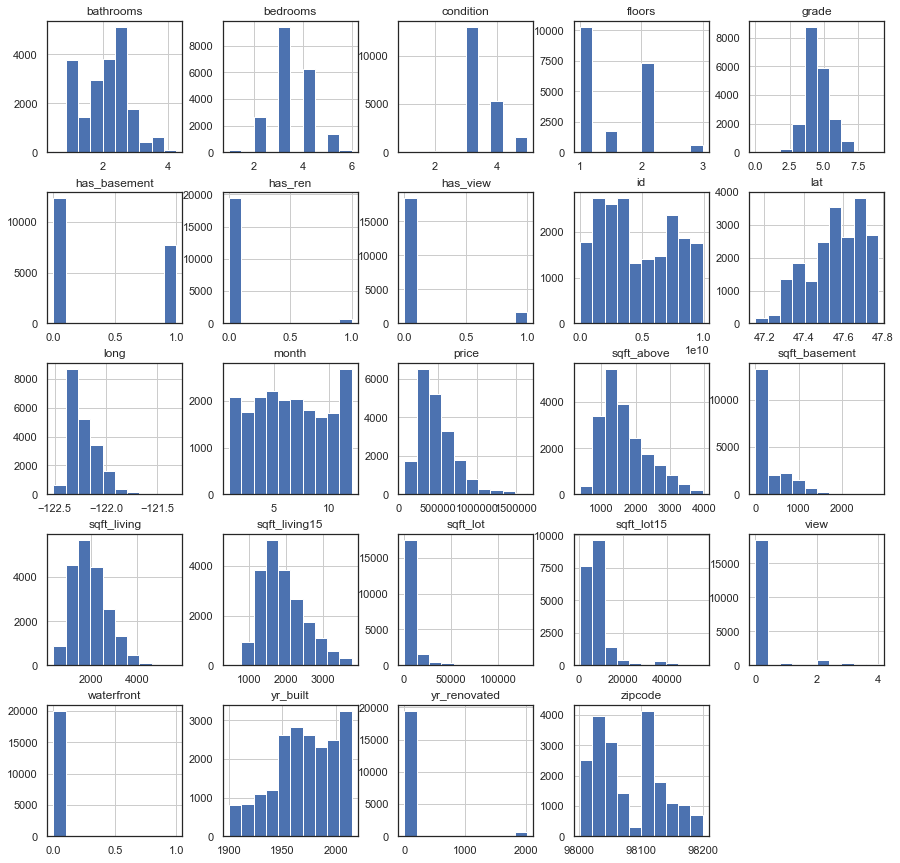

In [35]:
# Histogram to explore normality.  This is a basic eyeball test.
# Many of the values appear skewed or zero biased.
df.hist(figsize=(15,15));

### Categorical:

These categorical values I'll be using have already been one hot encoded.

In [275]:
cat = ['has_basement', 'has_view', 'has_ren', 'waterfront', 'grade', 
       'condition', 'bedrooms', 'floors', 'id', 'zipcode', 'city']
df_cat = df[cat]

#### One Hot Encoding:

In [276]:
import warnings
warnings.filterwarnings('ignore')

In [277]:
#Bedrooms
df_cat['bed1'] = df_cat['bedrooms'].map(lambda x: 1 if x == 1 else 0)
df_cat['bed2'] = df_cat['bedrooms'].map(lambda x: 1 if x == 2 else 0)
df_cat['bed3'] = df_cat['bedrooms'].map(lambda x: 1 if x == 3 else 0)
df_cat['bed4'] = df_cat['bedrooms'].map(lambda x: 1 if x == 4 else 0)
df_cat['bed5plus'] = df_cat['bedrooms'].map(lambda x: 1 if x > 4 else 0)
df_cat.drop(columns='bedrooms', axis=1, inplace = True)

In [278]:
#Condition
df_cat['con2minus'] = df_cat['condition'].map(lambda x: 1 if x < 3 else 0)
df_cat['con3'] = df_cat['condition'].map(lambda x: 1 if x == 3 else 0)
df_cat['con4'] = df_cat['condition'].map(lambda x: 1 if x == 4 else 0)
df_cat['con5'] = df_cat['condition'].map(lambda x: 1 if x == 5 else 0)
df_cat.drop(columns='condition', axis=1, inplace = True)

In [279]:
#Floors
df_cat['1floor'] = df_cat['floors'].map(lambda x: 1 if x == 1 else 0)
df_cat['2floors'] = df_cat['floors'].map(lambda x: 1 if x == 2 else 0)
df_cat['3plusfloors'] = df_cat['floors'].map(lambda x: 1 if x > 2 else 0)
df_cat.drop(columns='floors', axis=1, inplace = True)

In [280]:
#Grade
df_cat['grade0to2'] = df_cat['grade'].map(lambda x: 1 if x < 3 else 0)
df_cat['grade3'] = df_cat['grade'].map(lambda x: 1 if x == 3 else 0)
df_cat['grade4'] = df_cat['grade'].map(lambda x: 1 if x == 4 else 0)
df_cat['grade5'] = df_cat['grade'].map(lambda x: 1 if x == 5 else 0)
df_cat['grade6'] = df_cat['grade'].map(lambda x: 1 if x == 6 else 0)
df_cat['grade7'] = df_cat['grade'].map(lambda x: 1 if x == 7 else 0)
df_cat['grade8'] = df_cat['grade'].map(lambda x: 1 if x == 8 else 0)
df_cat['grade9plus'] = df_cat['grade'].map(lambda x: 1 if x > 8 else 0)
df_cat.drop(columns = 'grade', axis = 1, inplace = True)

In [281]:
#Season
df_cat['spring'] = df['month'].map(lambda x: 1 if x < 6 and x > 2 else 0) 
df_cat['summer'] = df['month'].map(lambda x: 1 if x < 9 and x > 5 else 0) 
df_cat['fall'] = df['month'].map(lambda x: 1 if x < 12 and x > 8 else 0) 

In [282]:
# Do not run again if already run
ohe_to_drop = ['bed1', 'con2minus', '1floor', 'grade0to3']
df_cat.drop(columns = ohe_to_drop, axis = 1, inplace = True)

KeyError: "['grade0to3'] not found in axis"

In [283]:
df_cat.columns

Index(['has_basement', 'has_view', 'has_ren', 'waterfront', 'id', 'zipcode',
       'city', 'bed1', 'bed2', 'bed3', 'bed4', 'bed5plus', 'con2minus', 'con3',
       'con4', 'con5', '1floor', '2floors', '3plusfloors', 'grade0to2',
       'grade3', 'grade4', 'grade5', 'grade6', 'grade7', 'grade8',
       'grade9plus', 'spring', 'summer', 'fall'],
      dtype='object')

In [284]:
df_cat.head()

has_basement  has_view  has_ren  waterfront          id  zipcode  \
0             0         0        0         0.0  7129300520    98178   
1             1         0        1         0.0  6414100192    98125   
2             0         0        0         0.0  5631500400    98028   
3             1         0        0         0.0  2487200875    98136   
4             0         0        0         0.0  1954400510    98074   

        city  bed1  bed2  bed3  ...  grade3  grade4  grade5  grade6  grade7  \
0     Renton     0     0     1  ...       0       1       0       0       0   
1  N Seattle     0     0     1  ...       0       1       0       0       0   
2   North KC     0     1     0  ...       1       0       0       0       0   
3  W Seattle     0     0     0  ...       0       1       0       0       0   
4  Sammamish     0     0     1  ...       0       0       1       0       0   

   grade8  grade9plus  spring  summer  fall  
0       0           0       0       0     1  
1       0           0       0       0     0  
2       0           0       0       0     0  
3       0           0       0       0     0  
4       0           0       0       0     0  

[5 rows x 30 columns]

#### Zip Codes:

In [285]:
#OHE - Dropping Kent to avoid Dummy Variable Trap
df_cat_city_ii = pd.get_dummies(df['city'])
df_cat_city_ii.drop(columns = 'Kent', axis = 1, inplace = True)
df_cat_city_ii.head()

Bellevue  Burien  East Side  Federal Way  Kirkland  Medina  Mercer Island  \
0         0       0          0            0         0       0              0   
1         0       0          0            0         0       0              0   
2         0       0          0            0         0       0              0   
3         0       0          0            0         0       0              0   
4         0       0          0            0         0       0              0   

   N Seattle  North KC  Renton  Sammamish  Seattle  South KC  Vashon  \
0          0         0       1          0        0         0       0   
1          1         0       0          0        0         0       0   
2          0         1       0          0        0         0       0   
3          0         0       0          0        0         0       0   
4          0         0       0          1        0         0       0   

   W Seattle  
0          0  
1          0  
2          0  
3          1  
4          0

##### ZIP CODE FINAL DF

** THIS IS THE FINAL SOURCE OF TRUTH FOR DUMMY VARIABLES WITH FIRST COLUMNS DROPPED FOR CATEGORICAL DATA **

In [286]:
cat_city = pd.concat([df_cat, df_cat_city_ii], axis=1)
cat_city.drop(columns = 'city', axis = 1, inplace = True)
cat_city.drop(columns = 'zipcode', axis = 1, inplace = True)
cat_city.drop(columns = 'id', axis = 1, inplace = True)
display(cat_city.head())
cat_city.info()

has_basement  has_view  has_ren  waterfront  bed1  bed2  bed3  bed4  \
0             0         0        0         0.0     0     0     1     0   
1             1         0        1         0.0     0     0     1     0   
2             0         0        0         0.0     0     1     0     0   
3             1         0        0         0.0     0     0     0     1   
4             0         0        0         0.0     0     0     1     0   

   bed5plus  con2minus  ...  Medina  Mercer Island  N Seattle  North KC  \
0         0          0  ...       0              0          0         0   
1         0          0  ...       0              0          1         0   
2         0          0  ...       0              0          0         1   
3         0          0  ...       0              0          0         0   
4         0          0  ...       0              0          0         0   

   Renton  Sammamish  Seattle  South KC  Vashon  W Seattle  
0       1          0        0         0       0          0  
1       0          0        0         0       0          0  
2       0          0        0         0       0          0  
3       0          0        0         0       0          1  
4       0          1        0         0       0          0  

[5 rows x 42 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20064 entries, 0 to 21596
Data columns (total 42 columns):
has_basement     20064 non-null int64
has_view         20064 non-null int64
has_ren          20064 non-null int64
waterfront       20064 non-null float64
bed1             20064 non-null int64
bed2             20064 non-null int64
bed3             20064 non-null int64
bed4             20064 non-null int64
bed5plus         20064 non-null int64
con2minus        20064 non-null int64
con3             20064 non-null int64
con4             20064 non-null int64
con5             20064 non-null int64
1floor           20064 non-null int64
2floors          20064 non-null int64
3plusfloors      20064 non-null int64
grade0to2        20064 non-null int64
grade3           20064 non-null int64
grade4           20064 non-null int64
grade5           20064 non-null int64
grade6           20064 non-null int64
grade7           20064 non-null int64
grade8           20064 non-null int64
grade9plus     

In [287]:
# Now we need to drop, city, zipcode, and id
df_cat.drop(columns = 'city', axis = 1, inplace = True)
df_cat.drop(columns = 'zipcode', axis = 1, inplace = True)
df_cat.drop(columns = 'id', axis = 1, inplace = True)
display(df_cat.head())
df_cat.info()

has_basement  has_view  has_ren  waterfront  bed1  bed2  bed3  bed4  \
0             0         0        0         0.0     0     0     1     0   
1             1         0        1         0.0     0     0     1     0   
2             0         0        0         0.0     0     1     0     0   
3             1         0        0         0.0     0     0     0     1   
4             0         0        0         0.0     0     0     1     0   

   bed5plus  con2minus  ...  grade3  grade4  grade5  grade6  grade7  grade8  \
0         0          0  ...       0       1       0       0       0       0   
1         0          0  ...       0       1       0       0       0       0   
2         0          0  ...       1       0       0       0       0       0   
3         0          0  ...       0       1       0       0       0       0   
4         0          0  ...       0       0       1       0       0       0   

   grade9plus  spring  summer  fall  
0           0       0       0     1  
1           0       0       0     0  
2           0       0       0     0  
3           0       0       0     0  
4           0       0       0     0  

[5 rows x 27 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20064 entries, 0 to 21596
Data columns (total 27 columns):
has_basement    20064 non-null int64
has_view        20064 non-null int64
has_ren         20064 non-null int64
waterfront      20064 non-null float64
bed1            20064 non-null int64
bed2            20064 non-null int64
bed3            20064 non-null int64
bed4            20064 non-null int64
bed5plus        20064 non-null int64
con2minus       20064 non-null int64
con3            20064 non-null int64
con4            20064 non-null int64
con5            20064 non-null int64
1floor          20064 non-null int64
2floors         20064 non-null int64
3plusfloors     20064 non-null int64
grade0to2       20064 non-null int64
grade3          20064 non-null int64
grade4          20064 non-null int64
grade5          20064 non-null int64
grade6          20064 non-null int64
grade7          20064 non-null int64
grade8          20064 non-null int64
grade9plus      20064 non-null int64
s

### Continuous:

These may need to be log transformed for normality.

In [226]:
con = ['sqft_living', 'yr_built', 'bathrooms', 'sqft_lot']
df_con = df[con]

#### Log and Other Transformations:

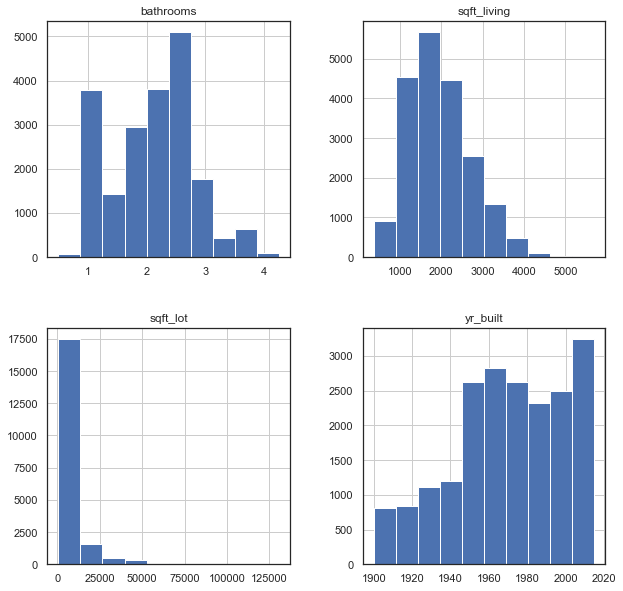

In [227]:
# Histogram to explore normality.  This is a basic eyeball test.
# Many of the values appear skewed or zero biased.
df_con.hist(figsize=(10,10));

In [228]:
# Log Transform
log_names = [f'{column}_log' for column in df_con.columns]

df_log = np.log(df_con)
df_log.columns = log_names

# Normalize

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

display(df_log.head(2))
display(df_log_norm.head(2))

sqft_living_log  yr_built_log  bathrooms_log  sqft_lot_log
0         7.073270      7.578145        0.00000      8.639411
1         7.851661      7.576097        0.81093      8.887653

sqft_living_log  yr_built_log  bathrooms_log  sqft_lot_log
0        -1.109079     -0.508032      -1.715030     -0.316754
1         0.876842     -0.644878       0.427326      0.018355

Log Transformations are a way of inducing normality from an otherwise not normally distributed set of data.

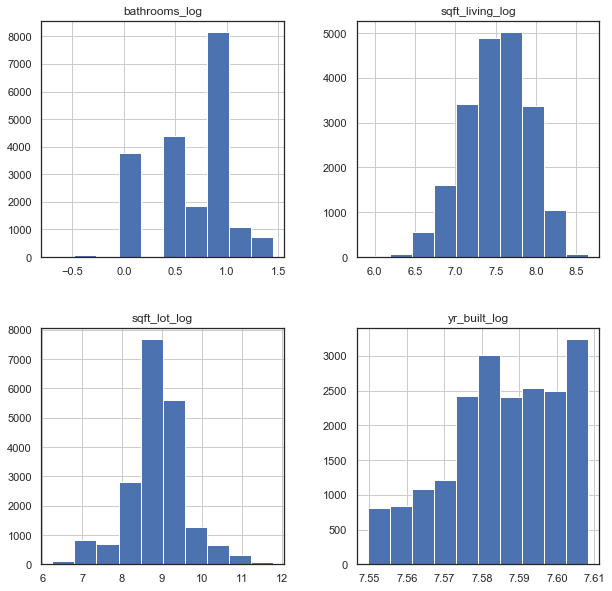

In [229]:
#Sqft living looks much more normal now.
df_log.hist(figsize=(10,10));

# Regression Models:

In [230]:
baseline_df = pd.concat([df_cat, df_con], axis=1)
feat_eng_df = pd.concat([df_log, cat_city], axis=1)
# Baseline
blX = baseline_df
# Baseline + Cities
city_X = pd.concat([df_con, cat_city], axis=1)
# Feature Engineering
logX = feat_eng_df
# Dependent variable is Price
y = df['price']

Importing Libraries:

In [231]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.preprocessing import LabelBinarizer

## Simple Linear Model:

Here, we'll start with a relatively simple model to explore the data and see which variables are the most significant with a regression.

It's important to have a simple model with few transformations or polynomial features in order to have a baseline to compare other models against.

### Linear Model 1:

In [288]:
# Model 1
# Name: model_base
# X: blX
model_base = sm.OLS(y,blX).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              8451.
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                        0.00
Time:                        11:25:52   Log-Likelihood:                     -2.6948e+05
No. Observations:               20064   AIC:                                  5.390e+05
Df Residuals:                   20040   BIC:                                  5.392e+05
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
has_basement  3.994e+04   2812.183     14.203      0.000    3.44e+04    4.55e+04
has_view      1.057e+05   4512.015     23.437      0.000    9.69e+04    1.15e+05
has_ren       1.215e+05   6630.480     18.332      0.000    1.09e+05    1.35e+05
waterfront    2.589e+05   2.06e+04     12.538      0.000    2.18e+05    2.99e+05
bed2          6.297e+04   1.25e+04      5.040      0.000    3.85e+04    8.75e+04
bed3          1.455e+04   1.25e+04      1.167      0.243   -9892.427     3.9e+04
bed4          8477.3134   1.28e+04      0.664      0.507   -1.66e+04    3.35e+04
bed5plus      1.721e+04   1.35e+04      1.273      0.203   -9281.184    4.37e+04
con3          6.005e+04   1.25e+04      4.799      0.000    3.55e+04    8.46e+04
con4          1.057e+05   1.25e+04      8.436      0.000    8.11e+04     1.3e+05
con5          1.733e+05    1.3e+04     13.382      0.000    1.48e+05    1.99e+05
2floors      -2.046e+04   3501.559     -5.842      0.000   -2.73e+04   -1.36e+04
3plusfloors   5.372e+04   7085.746      7.581      0.000    3.98e+04    6.76e+04
grade4        6.784e+04   4275.104     15.868      0.000    5.95e+04    7.62e+04
grade5        1.588e+05   5084.559     31.229      0.000    1.49e+05    1.69e+05
grade6         3.07e+05   6507.081     47.178      0.000    2.94e+05     3.2e+05
grade7plus    4.516e+05   8540.034     52.875      0.000    4.35e+05    4.68e+05
spring         2.94e+04   3520.447      8.351      0.000    2.25e+04    3.63e+04
summer        9061.6134   3543.486      2.557      0.011    2116.089     1.6e+04
fall          5988.2455   3696.404      1.620      0.105   -1257.011    1.32e+04
sqft_living    114.3094      3.088     37.017      0.000     108.257     120.362
yr_built        14.7687      8.765      1.685      0.092      -2.411      31.948
bathrooms    -8245.4270   2840.440     -2.903      0.004   -1.38e+04   -2677.931
sqft_lot        -1.3482      0.121    -11.138      0.000      -1.585      -1.111
==============================================================================
Omnibus:                     3153.346   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8238.173
Skew:                           0.870   Prob(JB):                         0.00
Kurtosis:                       5.613   Cond. No.                     3.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__80/20 Split for Simple Linear Model:__

In [289]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(blX, y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16051 4013 16051 4013


In [290]:
#Model 1
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Root Mean Squarred Error:', np.sqrt(mse_train))
print('Test Root Mean Squarred Error:', np.sqrt(mse_test))

Train Root Mean Squarred Error: 154517.69842049718
Test Root Mean Squarred Error: 154844.6833482541


### Interpreting Results:

This is a great start!  RMSE pretty large, but r2 is quite high.  Additionally, there's only a $500 dollar difference between the root mean squared error of the train and test data! This means that so far, we don't have to worry about over-fitting. Right now, our main concern is keeping the r2 high while reducing RMSE. 
<br>Let's now test the following:
- Do log transformed variables improve the r2?
- Would a polynomial regression help?
- Are there any interactions we can use?
- How does including geographic data help?

### Model Validity:

Heteroscedasticity, QQ Plots and more:

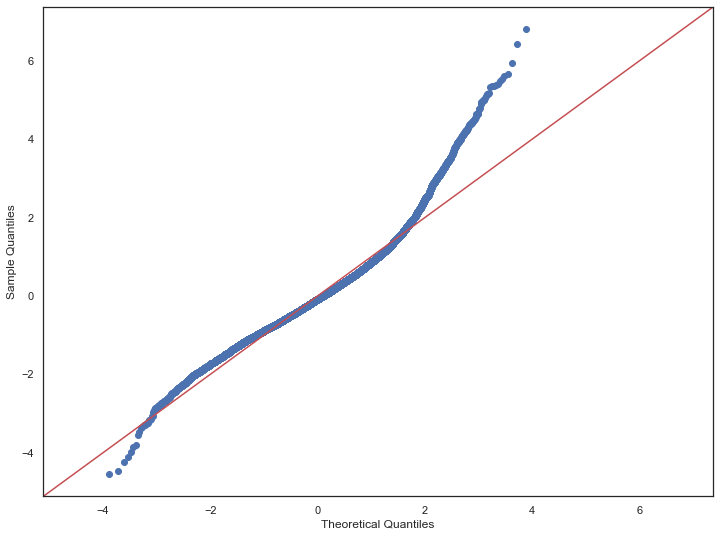

In [291]:
fig = sm.graphics.qqplot(model_base.resid, dist=stats.norm, line='45', fit=True)

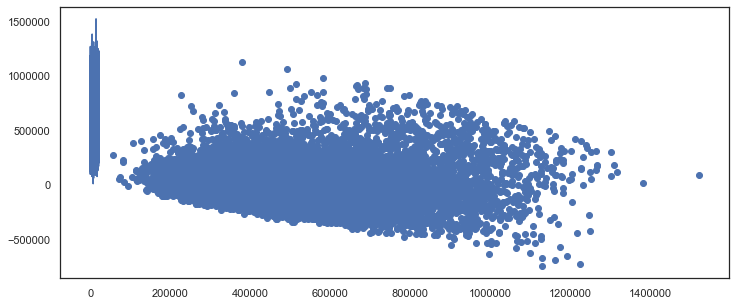

In [292]:
plt.figure(figsize=(12,5))
plt.scatter(model_base.predict(blX), model_base.resid)
plt.plot(model_base.predict(blX, [0 for i in range(len(blX))]))

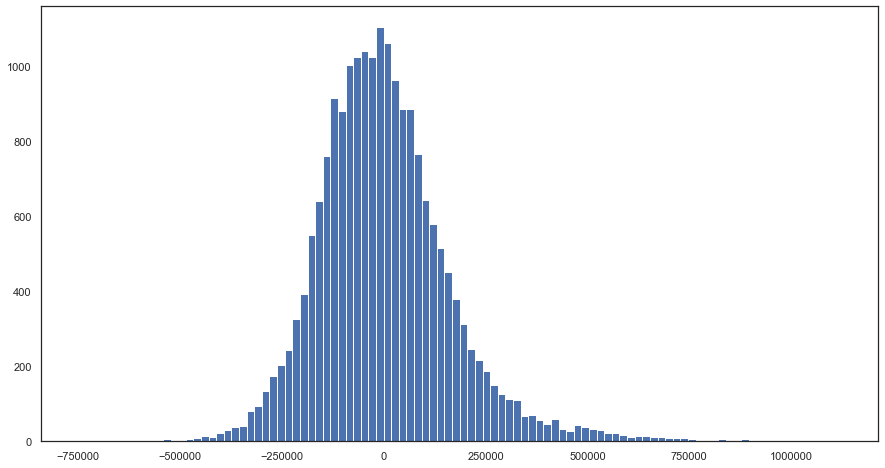

In [293]:
# Not perfect, but normal enough to not cause alarm.
plt.figure(figsize=(15,8))
plt.hist(model_base.resid, bins=100);

## Linear Model with Cities:

In [294]:
# Name: model_city
# X: city_X
model_city = sm.OLS(y, city_X).fit()
model_city.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              9345.
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                        0.00
Time:                        11:26:12   Log-Likelihood:                     -2.6400e+05
No. Observations:               20064   AIC:                                  5.281e+05
Df Residuals:                   20025   BIC:                                  5.284e+05
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     121.8829      2.370     51.437      0.000     117.238     126.527
yr_built        -58.2578      7.458     -7.811      0.000     -72.876     -43.640
bathrooms      7186.4506   2178.902      3.298      0.001    2915.622    1.15e+04
sqft_lot          0.4144      0.096      4.295      0.000       0.225       0.604
has_basement  -7719.1327   2251.473     -3.428      0.001   -1.21e+04   -3306.059
has_view        9.93e+04   3479.711     28.536      0.000    9.25e+04    1.06e+05
has_ren        7.504e+04   5083.439     14.762      0.000    6.51e+04     8.5e+04
waterfront     3.456e+05    1.6e+04     21.600      0.000    3.14e+05    3.77e+05
bed2           3.422e+04   9520.995      3.594      0.000    1.56e+04    5.29e+04
bed3           2.784e+04   9499.855      2.931      0.003    9222.503    4.65e+04
bed4           2.164e+04   9734.783      2.223      0.026    2559.004    4.07e+04
bed5plus       5612.2085   1.03e+04      0.544      0.586   -1.46e+04    2.58e+04
con3           3.525e+04   9542.867      3.694      0.000    1.65e+04     5.4e+04
con4           6.836e+04   9550.461      7.158      0.000    4.96e+04    8.71e+04
con5            1.11e+05   9894.809     11.218      0.000    9.16e+04     1.3e+05
2floors       -1.584e+04   2709.100     -5.846      0.000   -2.11e+04   -1.05e+04
3plusfloors   -2.884e+04   5582.768     -5.165      0.000   -3.98e+04   -1.79e+04
grade4         3.356e+04   3289.058     10.205      0.000    2.71e+04       4e+04
grade5         1.025e+05   3935.672     26.038      0.000    9.48e+04     1.1e+05
grade6         2.156e+05   5056.521     42.629      0.000    2.06e+05    2.25e+05
grade7plus     3.236e+05   6689.410     48.371      0.000     3.1e+05    3.37e+05
spring         1.935e+04   2683.840      7.211      0.000    1.41e+04    2.46e+04
summer        -1543.0122   2701.091     -0.571      0.568   -6837.373    3751.349
fall          -5675.3836   2817.158     -2.015      0.044   -1.12e+04    -153.521
Bellevue       3.284e+05   7464.440     44.000      0.000    3.14e+05    3.43e+05
Burien         9.572e+04   9697.790      9.870      0.000    7.67e+04    1.15e+05
East Side      1.638e+05   6928.268     23.642      0.000     1.5e+05    1.77e+05
Federal Way   -1.088e+04   7905.167     -1.377      0.169   -2.64e+04    4611.217
Kirkland        2.59e+05   7677.824     33.738      0.000    2.44e+05    2.74e+05
Medina         8.268e+05   3.11e+04     26.556      0.000    7.66e+05    8.88e+05
Mercer Island  4.587e+05   1.07e+04     42.950      0.000    4.38e+05     4.8e+05
N Seattle      2.951e+05   6869.629     42.955      0.000    2.82e+05    3.09e+05
North KC       1.627e+05   7226.208     22.515      0.000    1.49e+05    1.77e+05
Renton         8.294e+04   7317.

In [295]:
# Train Test split for city linear model:
X_train2, X_test2, y_train2, y_test2 = train_test_split(city_X, y, test_size=0.2, random_state=42)
print(len(X_train2), len(X_test2), len(y_train2), len(y_test2))

16051 4013 16051 4013


In [296]:
linreg = LinearRegression()
linreg.fit(X_train2, y_train2)

y_hat_train2 = linreg.predict(X_train2)
y_hat_test2 = linreg.predict(X_test2)

train_residuals2 = y_hat_train2 - y_train2
test_residuals2 = y_hat_test2 - y_test2

mse_train = np.sum((y_train2-y_hat_train2)**2)/len(y_train2)
mse_test = np.sum((y_test2-y_hat_test2)**2)/len(y_test2)
print('Train Root Mean Squarred Error:', np.sqrt(mse_train))
print('Test Root Mean Squarred Error:', np.sqrt(mse_test))

Train Root Mean Squarred Error: 123623.93376695372
Test Root Mean Squarred Error: 121268.5650267577


### Linear City Model Notes:

- Huge improvement in r2, but RMSE is still a bit large
- So far best model, though

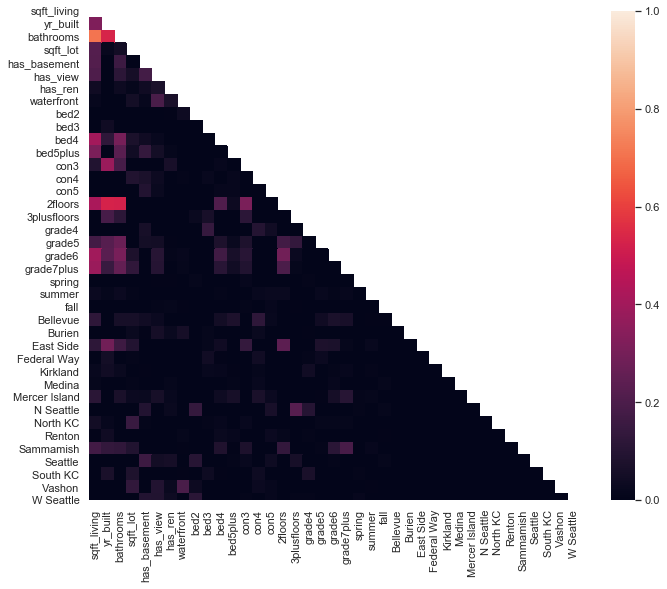

In [241]:
# Secondary Multicollinearity Check:
# No major issues!
sns.set_style('white')
f, ax = plt.subplots(figsize=(11, 9))
corr = city_X.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(city_X.corr(), vmin=0, mask = mask);

### QQ Plot:

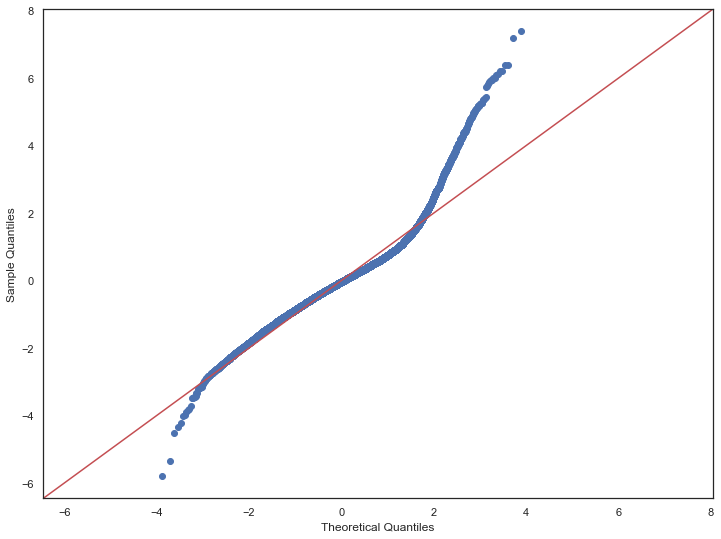

In [297]:
fig = sm.graphics.qqplot(model_city.resid, dist=stats.norm, line='45', fit=True)

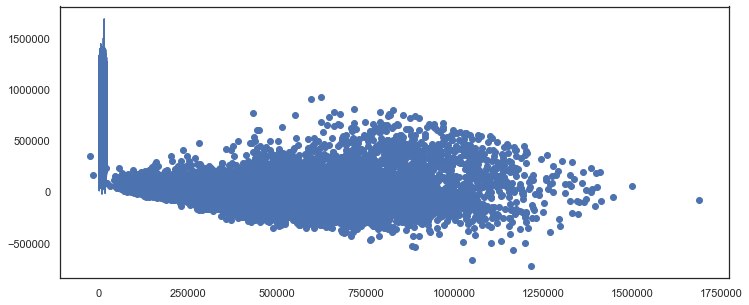

In [243]:
plt.figure(figsize=(12,5))
plt.scatter(model_city.predict(city_X), model_city.resid)
plt.plot(model_city.predict(city_X, [0 for i in range(len(city_X))]))

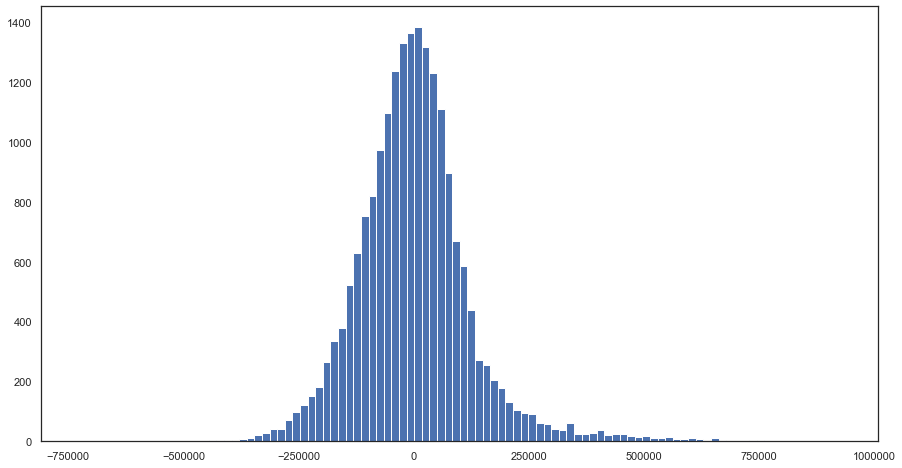

In [244]:
plt.figure(figsize=(15,8))
plt.hist(model_city.resid, bins=100);

## City Model 2.0 - Refinement:

We'll start by dropping 'bed5plus' as it was the least significant, and then move from there to refine further.

In [298]:
city_X_ii = city_X.drop(columns = 'bed5plus', axis = 1)

In [299]:
city_X_ii.drop(columns = 'Federal Way', axis = 1, inplace = True)

In [300]:
city_X_ii.drop(columns = 'summer', axis = 1, inplace = True)

In [301]:
# Name: model_city_ii
# X: city_X_ii
model_city_ii = sm.OLS(y, city_X_ii).fit()
model_city_ii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                          1.012e+04
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                        0.00
Time:                        11:26:32   Log-Likelihood:                     -2.6400e+05
No. Observations:               20064   AIC:                                  5.281e+05
Df Residuals:                   20028   BIC:                                  5.284e+05
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     122.1565      2.313     52.813      0.000     117.623     126.690
yr_built        -60.4166      5.852    -10.324      0.000     -71.887     -48.946
bathrooms      7288.6858   2174.388      3.352      0.001    3026.707    1.16e+04
sqft_lot          0.4130      0.096      4.281      0.000       0.224       0.602
has_basement  -7761.0373   2251.210     -3.447      0.001   -1.22e+04   -3348.480
has_view       9.919e+04   3477.268     28.524      0.000    9.24e+04    1.06e+05
has_ren        7.489e+04   5082.320     14.736      0.000    6.49e+04    8.49e+04
waterfront     3.453e+05    1.6e+04     21.593      0.000    3.14e+05    3.77e+05
bed2           2.963e+04   4494.291      6.593      0.000    2.08e+04    3.84e+04
bed3             2.3e+04   3574.866      6.434      0.000     1.6e+04       3e+04
bed4           1.667e+04   3466.414      4.809      0.000    9876.778    2.35e+04
con3           3.547e+04   9530.325      3.721      0.000    1.68e+04    5.41e+04
con4           6.855e+04   9532.372      7.191      0.000    4.99e+04    8.72e+04
con5           1.112e+05   9874.316     11.260      0.000    9.18e+04    1.31e+05
2floors       -1.579e+04   2701.011     -5.846      0.000   -2.11e+04   -1.05e+04
3plusfloors   -2.868e+04   5577.134     -5.142      0.000   -3.96e+04   -1.77e+04
grade4         3.376e+04   3278.607     10.296      0.000    2.73e+04    4.02e+04
grade5         1.025e+05   3934.681     26.041      0.000    9.48e+04     1.1e+05
grade6         2.155e+05   5055.029     42.623      0.000    2.06e+05    2.25e+05
grade7plus     3.232e+05   6678.422     48.396      0.000     3.1e+05    3.36e+05
spring         2.036e+04   2076.987      9.802      0.000    1.63e+04    2.44e+04
fall          -4702.0776   2245.553     -2.094      0.036   -9103.546    -300.609
Bellevue       3.357e+05   5262.683     63.785      0.000    3.25e+05    3.46e+05
Burien         1.029e+05   8139.454     12.643      0.000     8.7e+04    1.19e+05
East Side      1.709e+05   4481.319     38.137      0.000    1.62e+05     1.8e+05
Kirkland       2.662e+05   5571.367     47.785      0.000    2.55e+05    2.77e+05
Medina         8.339e+05   3.07e+04     27.177      0.000    7.74e+05    8.94e+05
Mercer Island   4.66e+05   9270.907     50.260      0.000    4.48e+05    4.84e+05
N Seattle      3.022e+05   4468.770     67.617      0.000    2.93e+05    3.11e+05
North KC       1.699e+05   4936.233     34.418      0.000     1.6e+05     1.8e+05
Renton         9.013e+04   5079.631     17.744      0.000    8.02e+04       1e+05
Sammamish      2.041e+05   6175.206     33.058      0.000    1.92e+05    2.16e+05
Seattle        3.163e+05   4704.517     67.231      0.000    3.07e+05    3.26e+05
South KC       3.723e+04   4349.

In [302]:
# Train Test split for city linear model:
X_train3, X_test3, y_train3, y_test3 = train_test_split(city_X_ii, y, test_size=0.2, random_state=42)
print(len(X_train3), len(X_test3), len(y_train3), len(y_test3))

16051 4013 16051 4013


In [303]:
linreg = LinearRegression()
linreg.fit(X_train3, y_train3)

y_hat_train3 = linreg.predict(X_train3)
y_hat_test3 = linreg.predict(X_test3)

train_residuals3 = y_hat_train3 - y_train3
test_residuals3 = y_hat_test3 - y_test3

mse_train = np.sum((y_train3-y_hat_train3)**2)/len(y_train3)
mse_test = np.sum((y_test3-y_hat_test3)**2)/len(y_test3)
print('Train Root Mean Squarred Error:', np.sqrt(mse_train))
print('Test Root Mean Squarred Error:', np.sqrt(mse_test))

Train Root Mean Squarred Error: 123654.65757205813
Test Root Mean Squarred Error: 121332.95195051143


The model is a bit cleaner, but no significant change.

### City Model 2.0 Results:

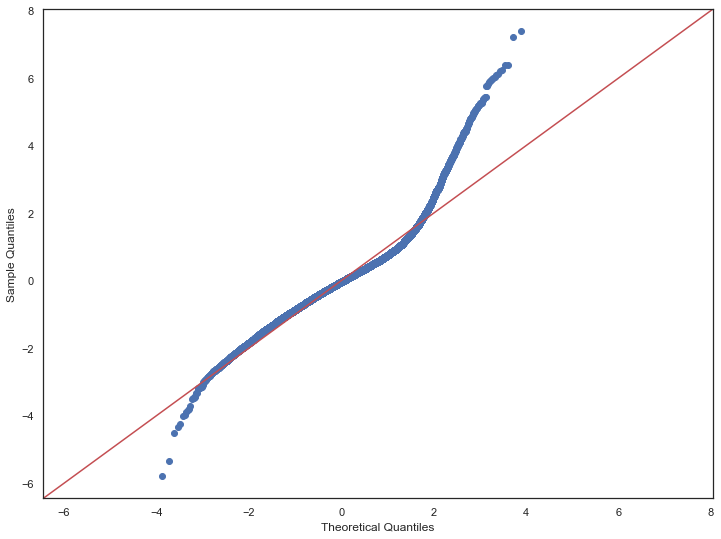

In [251]:
# QQ Plot:
fig = sm.graphics.qqplot(model_city_ii.resid, dist=stats.norm, line='45', fit=True)

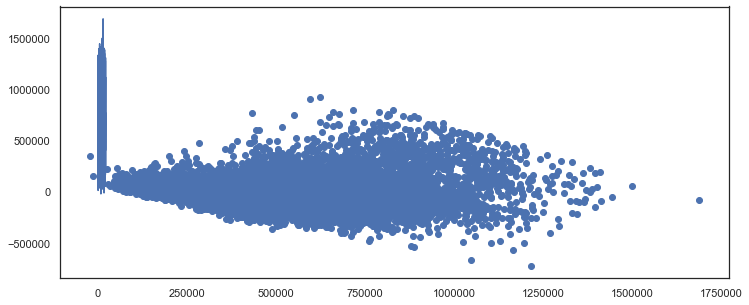

In [252]:
# Heteroskedascticity:
plt.figure(figsize=(12,5))
plt.scatter(model_city_ii.predict(city_X_ii), model_city_ii.resid)
plt.plot(model_city_ii.predict(city_X_ii, [0 for i in range(len(city_X_ii))]));

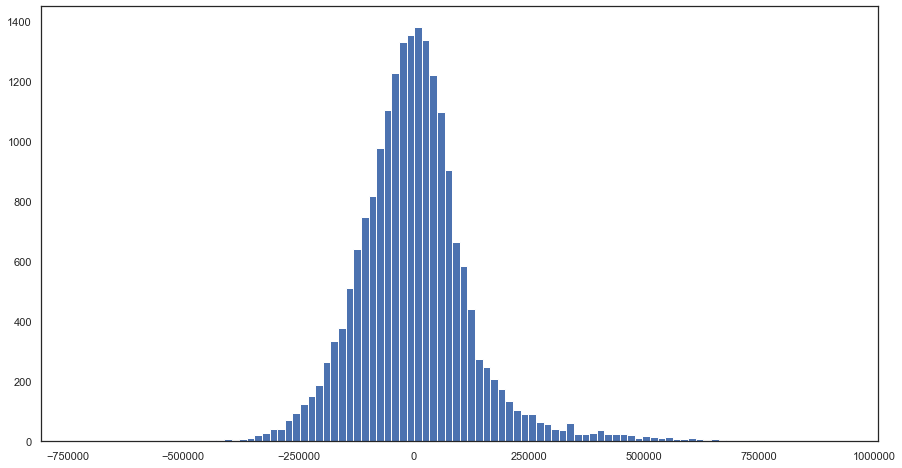

In [253]:
# Residual histogram:
plt.figure(figsize=(15,8))
plt.hist(model_city_ii.resid, bins=100);

## Multiple Regression with Transformations:

In [254]:
# Name: model_log
# X: logX
model_log = sm.OLS(y, logX).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              9205.
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                        0.00
Time:                        11:08:08   Log-Likelihood:                     -2.6415e+05
No. Observations:               20064   AIC:                                  5.284e+05
Df Residuals:                   20025   BIC:                                  5.287e+05
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
sqft_living_log  2.271e+05   4883.676     46.510      0.000    2.18e+05    2.37e+05
yr_built_log     -2.06e+05   4532.815    -45.439      0.000   -2.15e+05   -1.97e+05
bathrooms_log   -3629.8760   4064.262     -0.893      0.372   -1.16e+04    4336.412
sqft_lot_log     1.065e+04   1738.845      6.124      0.000    7240.527    1.41e+04
has_basement    -6016.7167   2317.870     -2.596      0.009   -1.06e+04   -1473.500
has_view         1.036e+05   3498.797     29.604      0.000    9.67e+04     1.1e+05
has_ren          7.447e+04   5119.168     14.548      0.000    6.44e+04    8.45e+04
waterfront       3.323e+05   1.61e+04     20.617      0.000    3.01e+05    3.64e+05
bed2            -1.577e+04   9660.878     -1.633      0.103   -3.47e+04    3162.134
bed3            -3.709e+04   9735.134     -3.810      0.000   -5.62e+04    -1.8e+04
bed4            -4.062e+04   1.01e+04     -4.039      0.000   -6.03e+04   -2.09e+04
bed5plus        -4.346e+04   1.06e+04     -4.093      0.000   -6.43e+04   -2.26e+04
con3             1.501e+04   9610.032      1.562      0.118   -3821.695    3.39e+04
con4             4.594e+04   9654.078      4.759      0.000     2.7e+04    6.49e+04
con5              9.08e+04      1e+04      9.054      0.000    7.11e+04     1.1e+05
2floors         -6291.2931   2847.225     -2.210      0.027   -1.19e+04    -710.498
3plusfloors     -1.176e+04   5959.171     -1.973      0.048   -2.34e+04     -78.083
grade4           2.014e+04   3394.218      5.934      0.000    1.35e+04    2.68e+04
grade5           9.221e+04   4106.983     22.453      0.000    8.42e+04       1e+05
grade6           2.203e+05   5141.806     42.837      0.000     2.1e+05     2.3e+05
grade7plus       3.503e+05   6602.330     53.060      0.000    3.37e+05    3.63e+05
spring           1.831e+04   2703.519      6.774      0.000     1.3e+04    2.36e+04
summer          -2591.8565   2721.154     -0.952      0.341   -7925.543    2741.830
fall            -6419.3047   2838.060     -2.262      0.024    -1.2e+04    -856.472
Bellevue         3.198e+05   7545.377     42.380      0.000    3.05e+05    3.35e+05
Burien            8.58e+04   9796.643      8.758      0.000    6.66e+04    1.05e+05
East Side        1.556e+05   6982.280     22.279      0.000    1.42e+05    1.69e+05
Federal Way     -2.007e+04   7974.656     -2.516      0.012   -3.57e+04   -4437.088
Kirkland         2.511e+05   7751.904     32.392      0.000    2.36e+05    2.66e+05
Medina           8.159e+05   3.14e+04     26.007      0.000    7.54e+05    8.77e+05
Mercer Island    4.525e+05   1.08e+04     41.977      0.000    4.31e+05    4.74e+05
N Seattle        2.884e+05   7048.882     40.921      0.000    2.75e+05    3.02e+05
North KC         1.534e+05   7300.308     21

__Refining:__

In [255]:
logX_ii = logX.drop(columns = 'con3', axis = 1)

In [256]:
logX_ii.drop(columns = 'bed2', axis = 1, inplace = True)

In [257]:
logX_ii.drop(columns = 'bathrooms_log', axis = 1, inplace = True)

With these statistically insignificant variables cleared, we are ready to rebuild the model:

In [258]:
# Name: model_log_ii
# X: logX_ii
model_log_ii = sm.OLS(y, logX_ii).fit()
model_log_ii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                              9970.
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                        0.00
Time:                        11:08:20   Log-Likelihood:                     -2.6415e+05
No. Observations:               20064   AIC:                                  5.284e+05
Df Residuals:                   20028   BIC:                                  5.287e+05
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
sqft_living_log   2.25e+05   4542.584     49.541      0.000    2.16e+05    2.34e+05
yr_built_log    -2.043e+05   4128.143    -49.492      0.000   -2.12e+05   -1.96e+05
sqft_lot_log      1.08e+04   1717.199      6.291      0.000    7437.880    1.42e+04
has_basement    -6331.0067   2284.520     -2.771      0.006   -1.08e+04   -1853.160
has_view         1.037e+05   3498.272     29.657      0.000    9.69e+04    1.11e+05
has_ren           7.46e+04   5115.441     14.583      0.000    6.46e+04    8.46e+04
waterfront       3.329e+05   1.61e+04     20.654      0.000    3.01e+05    3.64e+05
bed3            -2.233e+04   3081.114     -7.246      0.000   -2.84e+04   -1.63e+04
bed4            -2.581e+04   3713.769     -6.950      0.000   -3.31e+04   -1.85e+04
bed5plus        -2.871e+04   4902.954     -5.856      0.000   -3.83e+04   -1.91e+04
con4             3.127e+04   2209.955     14.151      0.000    2.69e+04    3.56e+04
con5              7.59e+04   3495.148     21.717      0.000    6.91e+04    8.28e+04
2floors         -6942.1199   2722.031     -2.550      0.011   -1.23e+04   -1606.716
3plusfloors     -1.286e+04   5836.243     -2.204      0.028   -2.43e+04   -1421.409
grade4           1.979e+04   3348.095      5.911      0.000    1.32e+04    2.64e+04
grade5           9.176e+04   4020.119     22.825      0.000    8.39e+04    9.96e+04
grade6           2.201e+05   5087.821     43.251      0.000     2.1e+05     2.3e+05
grade7plus       3.502e+05   6555.028     53.422      0.000    3.37e+05    3.63e+05
spring           1.839e+04   2703.239      6.802      0.000    1.31e+04    2.37e+04
summer          -2465.1729   2720.083     -0.906      0.365   -7796.760    2866.414
fall            -6286.5092   2837.275     -2.216      0.027   -1.18e+04    -725.217
Bellevue         3.197e+05   7544.644     42.376      0.000    3.05e+05    3.34e+05
Burien           8.557e+04   9792.298      8.739      0.000    6.64e+04    1.05e+05
East Side        1.555e+05   6981.496     22.276      0.000    1.42e+05    1.69e+05
Federal Way     -2.023e+04   7974.423     -2.537      0.011   -3.59e+04   -4597.126
Kirkland          2.51e+05   7751.895     32.380      0.000    2.36e+05    2.66e+05
Medina            8.16e+05   3.14e+04     26.011      0.000    7.55e+05    8.78e+05
Mercer Island    4.523e+05   1.08e+04     41.961      0.000    4.31e+05    4.73e+05
N Seattle        2.888e+05   7036.645     41.036      0.000    2.75e+05    3.03e+05
North KC         1.535e+05   7300.010     21.031      0.000    1.39e+05    1.68e+05
Renton            7.52e+04   7388.680     10.178      0.000    6.07e+04    8.97e+04
Sammamish        1.879e+05   8208.694     22.888      0.000    1.72e+05    2.04e+05
Seattle          3.019e+05   7228.363     41

In [259]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(logX_ii, y, test_size=0.2, random_state=42)
print(len(X_train4), len(X_test4), len(y_train4), len(y_test4))

16051 4013 16051 4013


In [260]:
linreg = LinearRegression()
linreg.fit(X_train4, y_train4)

y_hat_train4 = linreg.predict(X_train4)
y_hat_test4 = linreg.predict(X_test4)

train_residuals = y_hat_train4 - y_train4
test_residuals = y_hat_test4 - y_test4

mse_train = np.sum((y_train4 -y_hat_train4)**2)/len(y_train4)
mse_test = np.sum((y_test4 -y_hat_test4)**2)/len(y_test4)
print('Train Root Mean Squarred Error:', np.sqrt(mse_train))
print('Test Root Mean Squarred Error:', np.sqrt(mse_test))

Train Root Mean Squarred Error: 125110.17384509351
Test Root Mean Squarred Error: 123080.5396047382


### Interpreting Log Regression Results:

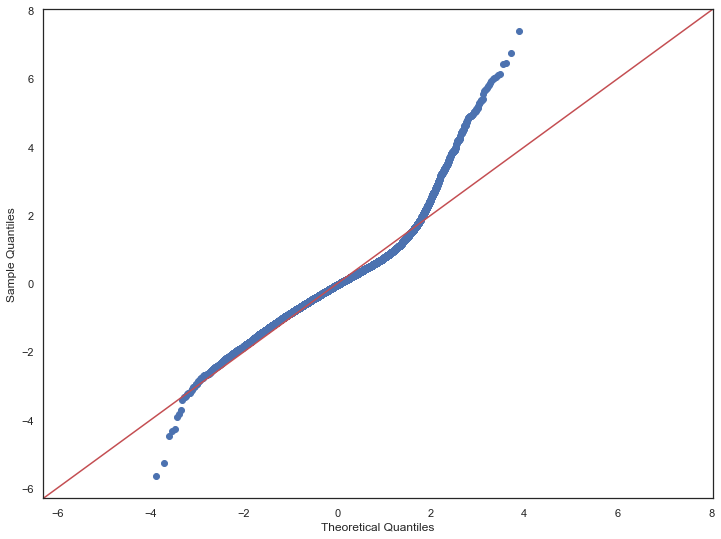

In [261]:
fig = sm.graphics.qqplot(model_log_ii.resid, dist=stats.norm, line='45', fit=True)

Not a step in the right direction. . . 
- RMSE is up
- r2 is down, albeit by a small amount
- Need to refine, get rid of some of the variables here
- Otherwise, doesn't seem much better than the other model

### Interpreting Results:

## Polynomial Regression:

Can we get better results with a polynomial model?  Let's try some of our top explanatory variables squared. . .

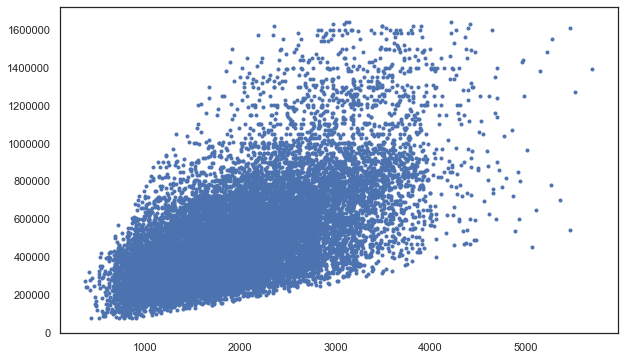

In [262]:
plt.figure(figsize=(10, 6))
plt.scatter(city_X_ii['sqft_living'], y, marker='.');

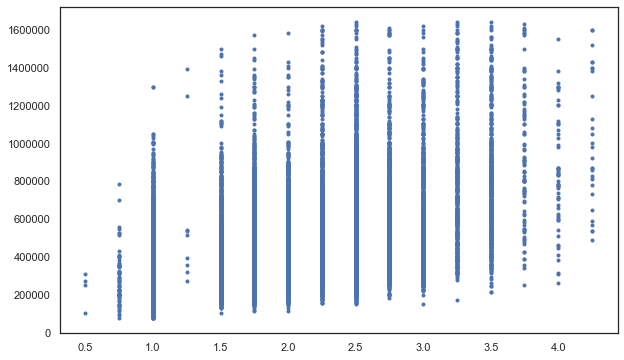

In [263]:
plt.figure(figsize=(10, 6))
plt.scatter(city_X_ii['bathrooms'], y, marker='.');
# Likely no need for polynomial model

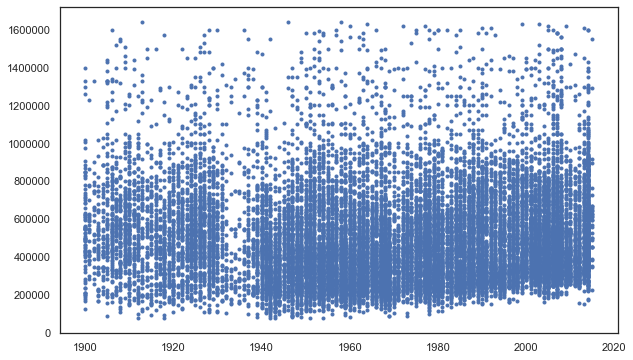

In [264]:
plt.figure(figsize=(10, 6))
plt.scatter(city_X_ii['yr_built'], y, marker='.');
# Likely no need for polynomial model
# Interesting to note how few houses were built in the Great Depression. . . 

In [265]:
city_X_iii = city_X_ii
city_X_iii['sqft_living_2'] = city_X_iii['sqft_living']**2
#city_X_iii = city_X.drop(columns = 'sqft_living', axis = 1)
#city_X_iii.info()

In [266]:
# Name: model_city_iii
# X: city_X_iii
# Notes: Similar model to the linear city model, but with sqft_living squared
model_city_iii = sm.OLS(y, city_X_iii).fit()
model_city_iii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              9854.
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                        0.00
Time:                        11:08:53   Log-Likelihood:                     -2.6400e+05
No. Observations:               20064   AIC:                                  5.281e+05
Df Residuals:                   20027   BIC:                                  5.284e+05
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     140.2702      7.004     20.027      0.000     126.541     153.999
yr_built        -67.2820      6.365    -10.570      0.000     -79.758     -54.806
bathrooms      6743.4894   2183.123      3.089      0.002    2464.388     1.1e+04
sqft_lot          0.4119      0.096      4.270      0.000       0.223       0.601
has_basement  -8431.2346   2264.098     -3.724      0.000   -1.29e+04   -3993.416
has_view       9.959e+04   3479.807     28.619      0.000    9.28e+04    1.06e+05
has_ren        7.459e+04   5082.726     14.675      0.000    6.46e+04    8.45e+04
waterfront     3.443e+05    1.6e+04     21.526      0.000    3.13e+05    3.76e+05
bed2            3.06e+04   4507.612      6.789      0.000    2.18e+04    3.94e+04
bed3           2.203e+04   3591.888      6.133      0.000     1.5e+04    2.91e+04
bed4           1.511e+04   3512.391      4.302      0.000    8225.304     2.2e+04
con3            3.48e+04   9531.903      3.651      0.000    1.61e+04    5.35e+04
con4            6.76e+04   9537.133      7.088      0.000    4.89e+04    8.63e+04
con5           1.102e+05   9879.741     11.151      0.000    9.08e+04     1.3e+05
2floors       -1.592e+04   2700.984     -5.893      0.000   -2.12e+04   -1.06e+04
3plusfloors   -2.798e+04   5582.001     -5.013      0.000   -3.89e+04    -1.7e+04
grade4         3.164e+04   3367.722      9.395      0.000     2.5e+04    3.82e+04
grade5         9.965e+04   4066.183     24.507      0.000    9.17e+04    1.08e+05
grade6         2.138e+05   5090.357     42.002      0.000    2.04e+05    2.24e+05
grade7plus     3.245e+05   6694.748     48.476      0.000    3.11e+05    3.38e+05
spring         2.036e+04   2076.649      9.803      0.000    1.63e+04    2.44e+04
fall          -4675.0542   2245.210     -2.082      0.037   -9075.851    -274.258
Bellevue       3.356e+05   5261.871     63.784      0.000    3.25e+05    3.46e+05
Burien         1.027e+05   8138.343     12.625      0.000    8.68e+04    1.19e+05
East Side      1.707e+05   4481.519     38.079      0.000    1.62e+05    1.79e+05
Kirkland       2.662e+05   5570.463     47.794      0.000    2.55e+05    2.77e+05
Medina         8.334e+05   3.07e+04     27.164      0.000    7.73e+05    8.94e+05
Mercer Island  4.663e+05   9270.164     50.299      0.000    4.48e+05    4.84e+05
N Seattle      3.022e+05   4468.132     67.643      0.000    2.93e+05    3.11e+05
North KC       1.697e+05   4936.007     34.378      0.000     1.6e+05    1.79e+05
Renton         8.997e+04   5079.138     17.714      0.000       8e+04    9.99e+04
Sammamish      2.038e+05   6175.278     33.007      0.000    1.92e+05    2.16e+05
Seattle        3.162e+05   4703.827     67.226      0.000    3.07e+05    3.25e+05
South KC       3.707e+04   4349.

In [267]:
# Train Test split for city polynomial model:
X_train5, X_test5, y_train5, y_test5 = train_test_split(city_X_iii, y, test_size=0.2, random_state=42)
print(len(X_train5), len(X_test5), len(y_train5), len(y_test5))

16051 4013 16051 4013


In [268]:
linreg = LinearRegression()
linreg.fit(X_train5, y_train5)

y_hat_train5 = linreg.predict(X_train5)
y_hat_test5 = linreg.predict(X_test5)

train_residuals5 = y_hat_train5 - y_train5
test_residuals5 = y_hat_test5 - y_test5

mse_train = np.sum((y_train5-y_hat_train5)**2)/len(y_train5)
mse_test = np.sum((y_test5-y_hat_test5)**2)/len(y_test5)
print('Train Root Mean Squarred Error:', np.sqrt(mse_train))
print('Test Root Mean Squarred Error:', np.sqrt(mse_test))

Train Root Mean Squarred Error: 123653.49348529454
Test Root Mean Squarred Error: 121332.51664795374


This model is statistically the same as what we had before with the other linear city model.

## Last Adjustments:

Seeing if we can squeeze out any sort of better model.

In [2]:
# Stepwise functions or recursion
# Bathrooms

# Final Model:

I will be using the City 2.0 model as my final model due to it's simplicity, ease of interpretation, and accuracy.  Throwing in more feature engineering did not improve results or accuracy, but the addition of City/Region data was an enormous improvement.<br>
This is intuitive as well, given how large a role location plays in the Seattle area.  It's valuable to gain conformation from the model, but any real estate expert can confirm!

Here is the model for your review:

In [269]:
model_city_ii = sm.OLS(y, city_X_ii).fit()
model_city_ii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              9854.
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                        0.00
Time:                        11:09:10   Log-Likelihood:                     -2.6400e+05
No. Observations:               20064   AIC:                                  5.281e+05
Df Residuals:                   20027   BIC:                                  5.284e+05
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     140.2702      7.004     20.027      0.000     126.541     153.999
yr_built        -67.2820      6.365    -10.570      0.000     -79.758     -54.806
bathrooms      6743.4894   2183.123      3.089      0.002    2464.388     1.1e+04
sqft_lot          0.4119      0.096      4.270      0.000       0.223       0.601
has_basement  -8431.2346   2264.098     -3.724      0.000   -1.29e+04   -3993.416
has_view       9.959e+04   3479.807     28.619      0.000    9.28e+04    1.06e+05
has_ren        7.459e+04   5082.726     14.675      0.000    6.46e+04    8.45e+04
waterfront     3.443e+05    1.6e+04     21.526      0.000    3.13e+05    3.76e+05
bed2            3.06e+04   4507.612      6.789      0.000    2.18e+04    3.94e+04
bed3           2.203e+04   3591.888      6.133      0.000     1.5e+04    2.91e+04
bed4           1.511e+04   3512.391      4.302      0.000    8225.304     2.2e+04
con3            3.48e+04   9531.903      3.651      0.000    1.61e+04    5.35e+04
con4            6.76e+04   9537.133      7.088      0.000    4.89e+04    8.63e+04
con5           1.102e+05   9879.741     11.151      0.000    9.08e+04     1.3e+05
2floors       -1.592e+04   2700.984     -5.893      0.000   -2.12e+04   -1.06e+04
3plusfloors   -2.798e+04   5582.001     -5.013      0.000   -3.89e+04    -1.7e+04
grade4         3.164e+04   3367.722      9.395      0.000     2.5e+04    3.82e+04
grade5         9.965e+04   4066.183     24.507      0.000    9.17e+04    1.08e+05
grade6         2.138e+05   5090.357     42.002      0.000    2.04e+05    2.24e+05
grade7plus     3.245e+05   6694.748     48.476      0.000    3.11e+05    3.38e+05
spring         2.036e+04   2076.649      9.803      0.000    1.63e+04    2.44e+04
fall          -4675.0542   2245.210     -2.082      0.037   -9075.851    -274.258
Bellevue       3.356e+05   5261.871     63.784      0.000    3.25e+05    3.46e+05
Burien         1.027e+05   8138.343     12.625      0.000    8.68e+04    1.19e+05
East Side      1.707e+05   4481.519     38.079      0.000    1.62e+05    1.79e+05
Kirkland       2.662e+05   5570.463     47.794      0.000    2.55e+05    2.77e+05
Medina         8.334e+05   3.07e+04     27.164      0.000    7.73e+05    8.94e+05
Mercer Island  4.663e+05   9270.164     50.299      0.000    4.48e+05    4.84e+05
N Seattle      3.022e+05   4468.132     67.643      0.000    2.93e+05    3.11e+05
North KC       1.697e+05   4936.007     34.378      0.000     1.6e+05    1.79e+05
Renton         8.997e+04   5079.138     17.714      0.000       8e+04    9.99e+04
Sammamish      2.038e+05   6175.278     33.007      0.000    1.92e+05    2.16e+05
Seattle        3.162e+05   4703.827     67.226      0.000    3.07e+05    3.25e+05
South KC       3.707e+04   4349.

In [ ]:
# City model 2.0 - Most important features:
-
- 
- 

In [271]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [272]:
results = stepwise_selection(city_X_ii, df['price'], verbose=True)
print('Stepwise Results:')
print(results)

Add  sqft_living                    with p-value 0.0
Add  South KC                       with p-value 0.0
Add  yr_built                       with p-value 2.84987e-246
Add  grade7plus                     with p-value 1.35278e-226
Add  grade6                         with p-value 0.0
Add  grade5                         with p-value 0.0
Add  Renton                         with p-value 6.46268e-176
Add  has_view                       with p-value 2.30183e-153
Add  Bellevue                       with p-value 7.57559e-156
Add  N Seattle                      with p-value 2.7064e-152
Add  Seattle                        with p-value 2.1041e-204
Add  Mercer Island                  with p-value 4.29694e-217
Add  Kirkland                       with p-value 1.70231e-130
Add  Medina                         with p-value 5.59142e-94
Add  waterfront                     with p-value 6.54345e-83
Add  grade4                         with p-value 3.82116e-57
Add  W Seattle                      with p-value 

# Further Work To Do:

In the future, I'd love to explore the following features to try to squeeze out a better model:
- x
- y
- z

Zero in on houses that have been renovated.  How long until sale typically?  Do they tend to sell for higher values than similar non renovated homes?  etc. . . 

Idea: 
- Crime data
- Quality of kitchen

Idea: 

# Conclusion:

Based on my final regression model, I can make the following statements about house prices, ceteris paribus:
- one
- Renovations help a homes value quite a bit.  All else equal, by around $75,000.  This is valuable information both for those looking to sell their homes, and people looking to buy and flip homes.
- Use renovations to increase grade!


Thanks for reading!

-Thomas Brown